# Sheet 4: Solution

In [3]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1: Elastic-Net with Lasso

Augment $\mathbf X$ with a multiple of the $p \times p$ identity to get

$$\hat {\mathbf X} = \begin{bmatrix} \mathbf X  \\ \gamma \mathbf I  \end{bmatrix}.$$

Then $\hat {\mathbf X} \beta = \begin{bmatrix} \mathbf X \beta \\ \gamma \mathbf \beta  \end{bmatrix}.$ We also modify $\mathbf y$ with $p$ zeros values as

$$ \hat{\mathbf y} = \begin{bmatrix} \mathbf y  \\ 0 \end{bmatrix}.$$

Then we get

$$
\| \hat{\mathbf y}  - \hat {\mathbf X} \beta  \|^2_2 = \left\|  \begin{bmatrix} \mathbf y - \mathbf X \beta \\ \gamma \beta \end{bmatrix}   \right\|^2_2. = \| \mathbf y - \mathbf X \beta \|^2_2 + \gamma^2 \|\beta\|^2_2.
$$

Now in the this augmented space a lasso problem for $\beta$ is

$$\hat \beta = \arg \min_\beta (\| \mathbf y - \mathbf X \beta \|^2_2 + \gamma^2 \|\beta\|^2_2 + \hat \lambda \|\beta\|_1).$$

Rewriting this using the above equation we get in the original variables the following
$$ \hat \beta = \arg \min_\beta (\| \mathbf y - \mathbf X \beta \|^2_2 + \gamma^2 \|\beta\|^2_2 + \hat \lambda \|\beta\|_1).
$$

By setting $\gamma^2 = \lambda \alpha$ or $\gamma = \sqrt{\lambda \alpha}$ and $\hat \lambda = \lambda (1-\alpha),$ we get the elastic-net regression.

Thus to solve the requested minimization problem given $\mathbf y, \mathbf X, \lambda$ and $\alpha$ perform the following steps

1. Augment $\mathbf y$ with $p$ additional zeros to get $\hat{\mathbf y} = \begin{bmatrix} \mathbf y  \\ 0 \end{bmatrix}.$
2. Augment $\mathbf X$ with the  multiple of the $p \times p$ identity matrix $\sqrt{\lambda \alpha} \mathbf I$ to get $\hat {\mathbf X} = \begin{bmatrix} \mathbf X  \\ \sqrt{\lambda \alpha} \mathbf I  \end{bmatrix}.$
3. Set $\hat \lambda = \lambda (1-\alpha).$
4. Solve the lasse minimization problem with input $\hat{\mathbf y}, \hat{\mathbf X}, \hat \lambda.$

The solution $\hat \beta$ is the desired solution to the entire problem.

## Exercise 2: Lasso regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#%cd '/content/drive/My Drive/Colab Notebooks/statisticallearning-2020/Sheet04/solution'

pcancer = pd.read_csv("prostate.csv",delimiter=',')

pcancer.head(8)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,True
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,False
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415,True


In [5]:
# There's a training sub-dataset that we will focus on. Later, we will try to predict
# the values of the remaining observations.
col_num = 8
Xtrain = pcancer.loc[pcancer['train'] == True,pcancer.columns[0:col_num]]
ytrain = pcancer.loc[pcancer['train'] == True,pcancer.columns[col_num]]
Xtrain.head(8)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0
10,0.254642,3.604138,65,-1.386294,0,-1.386294,6,0


In [6]:
names = list(Xtrain)
Xtest = pcancer.loc[pcancer['train'] == False,pcancer.columns[0:col_num]]
ytest = pcancer.loc[pcancer['train'] == False,pcancer.columns[col_num]]
Xtest.head(8)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0
14,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5
21,2.059239,3.501043,60,1.474763,0,1.348073,7,20
24,0.385262,3.667400,69,1.599388,0,-1.386294,6,0
25,1.446919,3.124565,68,0.300105,0,-1.386294,6,0
27,-0.400478,3.865979,67,1.816452,0,-1.386294,7,20


In [7]:
# scale data sets to have zero mean and unit variance, but do not adjust lpsa
from sklearn import linear_model,preprocessing
Xtrain_mean = np.mean(Xtrain)
Xtrain_std = np.std(Xtrain)
print(Xtrain_mean)
print(Xtrain_std)
# Scale training data to have zero mean and unit variance (standard derivation)
Xtrain = (Xtrain-Xtrain_mean)/Xtrain_std

Xtest.head(8)
# Scale testing data using training mean and trainig standard derivation
Xtest = (Xtest-Xtrain_mean)/Xtrain_std

lcavol      1.313492
lweight     3.626108
age        64.746269
lbph        0.071440
svi         0.223881
lcp        -0.214203
gleason     6.731343
pgg45      26.268657
dtype: float64
lcavol      1.233282
lweight     0.473031
age         7.446011
lbph        1.452691
svi         0.416843
lcp         1.390243
gleason     0.703554
pgg45      29.082272
dtype: float64


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
linear_reg = LinearRegression(fit_intercept=True).fit(Xtrain, ytrain)

Fit lasso 

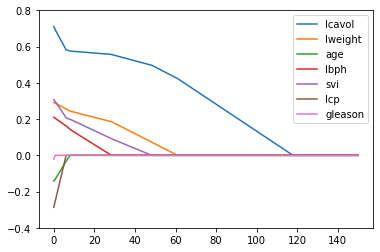

In [9]:
from sklearn.linear_model import Lasso
n_alphas = 1000
lam= np.linspace(0.0001, 150, n_alphas)
model_lasso_coef = np.zeros((lam.shape[0],9))
sample_num = Xtrain.shape[0]
for i in range(lam.shape[0]):
    model_lasso = Lasso(alpha=lam[i]/(2*np.shape(Xtrain)[0]), fit_intercept=True)
    model_lasso.fit(Xtrain, ytrain)
    #print(model_lasso.coef_)
    model_lasso_coef[i,:]=np.concatenate((model_lasso.intercept_.reshape(-1),model_lasso.coef_),axis=0)
    
    
plt.figure()
plt.plot(lam,model_lasso_coef[:,1:-1])
# plt.xscale('log')
plt.ylim(-0.4,0.8)
# plt.xlim(min(lam),2)
plt.legend(names[0:8])    

Match the solution with coordinate descent (coordinate descent will be addressed in the next lecture)



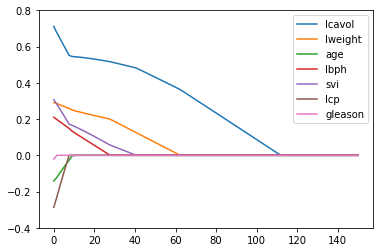

In [10]:
n_alphas = 100
lam= np.linspace(0.0001, 150, n_alphas)
X = np.concatenate((np.ones(Xtrain.shape[0]).reshape(-1,1),Xtrain),axis=1)
model_lasso_coef2 = np.zeros((lam.shape[0],9))

for i in range(lam.shape[0]):
    lam_i = lam[i]
    # compute the ridge-regression beta hat estimates:
    iden_mat = np.zeros((col_num+1,col_num+1))
    np.fill_diagonal(iden_mat,1)
    M = np.linalg.pinv(np.transpose(X).dot(X)+lam[i]*iden_mat).dot(np.transpose(X))
    # this is just an alternative way of estimating the coefficients of the Ridge regression  
    betaHat = M.dot(ytrain.values)
    residual = ytrain.values-X.dot(betaHat)
    for step in range(50):
        for j in range(Xtrain.shape[1]):
            # partial residuals
            residual = residual+X[:,j]*betaHat[j]
            a = 2*np.sum(X[:,j]**2)
            # soft-threshold solution
            c = 2*np.sum(X[:,j]*residual)
            betaHat[j]=(np.abs(c)-lam[i])/a
            betaHat[j]=np.sign(c)*np.maximum(betaHat[j],0)
            # residuals
            residual = residual-X[:,j]*betaHat[j]
            
    model_lasso_coef2[i,:]=betaHat    
            
plt.figure()
plt.plot(lam,model_lasso_coef2[:,1:-1])
# plt.xscale('log')
plt.ylim(-0.4,0.8)
# plt.xlim(min(lam),2)
plt.legend(names[0:8])


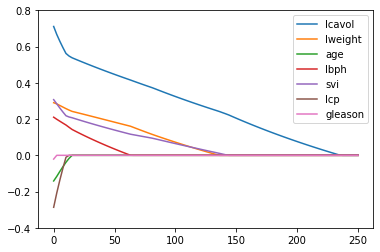

In [16]:
from sklearn.linear_model import ElasticNet
n_alphas = 100
lam= np.linspace(0.0001, 250, n_alphas)
model_elastic_coef = np.zeros((lam.shape[0],9))
sample_num = Xtrain.shape[0]
for i in range(lam.shape[0]):
    model_elastic = ElasticNet(alpha=lam[i]/(2*np.shape(Xtrain)[0]),l1_ratio=0.5, fit_intercept=True)
    model_elastic.fit(Xtrain, ytrain)
    #print(model_lasso.coef_)
    model_elastic_coef[i,:]=np.concatenate((model_elastic.intercept_.reshape(-1),model_elastic.coef_),axis=0)
    
    
plt.figure()
plt.plot(lam,model_elastic_coef[:,1:-1])
# plt.xscale('log')
plt.ylim(-0.4,0.8)
# plt.xlim(min(lam),2)
plt.legend(names[0:8])   

In [11]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
optim_ridge = RidgeCV(alphas=lam,fit_intercept=True).fit(Xtrain, ytrain)
print('optimal ridge regression strength lambda is:', optim_ridge.alpha_)
optim_lasso = LassoCV(alphas=lam/(2*np.shape(Xtrain)[0]),fit_intercept=True).fit(Xtrain, ytrain)
print('optimal lasso regression strength lambda is:', optim_lasso.alpha_*(2*np.shape(Xtrain)[0]))
optim_elastic = ElasticNetCV(alphas=lam/(2*np.shape(Xtrain)[0]),l1_ratio=0.5,fit_intercept=True).fit(Xtrain, ytrain)
print('optimal elastic regression strength lambda is:', optim_elastic.alpha_*(2*np.shape(Xtrain)[0]))

optimal ridge regression strength lambda is: 3.03040101010101
optimal lasso regression strength lambda is: 0.00010000000000000002
optimal elastic regression strength lambda is: 0.00010000000000000002


In [0]:
print('$\beta$ coefficients of ridge regression',optim_ridge.coef_)
print('$\beta$ coefficients of lasso regression',optim_lasso.coef_)
print('$\beta$ coefficients of elastic regression',optim_elastic.coef_)

$eta$ coefficients of ridge regression [ 6.51432228e-01  2.87821525e-01 -1.24234687e-01  2.05312946e-01
  2.93818300e-01 -2.13083523e-01 -8.83566428e-05  2.32561848e-01]
$eta$ coefficients of lasso regression [ 0.57355878  0.23801083 -0.          0.12819913  0.18821539 -0.
  0.          0.08024761]
$eta$ coefficients of elastic regression [ 0.53111185  0.23824439 -0.          0.1338145   0.20202597 -0.
  0.          0.09726913]


In [0]:
print('training error of ridge regression:',np.linalg.norm(np.array(ytrain) - optim_ridge.predict(Xtrain)))
print('training error of lasso regression:',np.linalg.norm(np.array(ytrain) - optim_lasso.predict(Xtrain)))
print('training error of elastic regression:',np.linalg.norm(np.array(ytrain)-optim_elastic.predict(Xtrain)))
print('testing error of ridge regression:',np.linalg.norm(np.array(ytest)-optim_ridge.predict(Xtest)))
print('testing error of lasso regression:',np.linalg.norm(np.array(ytest) - optim_lasso.predict(Xtest)))
print('testing error of elastic regression:',np.linalg.norm(np.array(ytest)-optim_elastic.predict(Xtest)))

training error of ridge regression: 5.441433144239014
training error of lasso regression: 5.4246091528219464
training error of elastic regression: 5.424609152769785
testing error of ridge regression: 3.884987319854745
testing error of lasso regression: 3.9545106324312735
testing error of elastic regression: 3.9545138351198137


## Exercise 3 (optional): Variance of beta

1. The criterion to minimize in ridge regression is given by
$$RSS(\beta, \lambda) := (\mathbf y - \mathbf X \beta)^T(\mathbf y - \mathbf X \beta) + \lambda \beta^T \mathbf I \beta.$$

Thus, we obtain the ridge expression as a special case of the generalized Tikhonov, by setting $\mathbf Q : = \mathbf I.$

2. Taking the derivative and setting it to zero, we have
$$ \frac{\partial}{\partial \beta} ((\mathbf y - \mathbf X \beta)^T(\mathbf y - \mathbf X \beta) + \lambda \beta^T \mathbf Q \beta) = 0,$$
which simplifies to 
$$ -2 \mathbf X^T \mathbf y + 2 \mathbf X^T \mathbf X \beta + 2 \lambda \mathbf Q \beta = 0.$$

Factoring $\beta$, we then obtain,

$$(\mathbf X^T \mathbf X + \lambda \mathbf Q) \beta = \mathbf X^T \mathbf y.$$

By assumption, we know that $(\mathbf X^T \mathbf X + \lambda \mathbf Q)$ is invertible, and thus,
$$ \hat \beta := (\mathbf X^T \mathbf X + \lambda \mathbf Q)^{-1} \mathbf X^T \mathbf y.$$

3. We have $$\hat {\mathbf y} = \mathbf X \hat \beta = \mathbf X (\mathbf X^T \mathbf X + \lambda \mathbf Q)^{-1} \mathbf X^T \mathbf y$$ and thus
$$ \mathbf H_\lambda = \mathbf X (\mathbf X^T \mathbf X + \lambda \mathbf Q)^{-1} \mathbf X^T.$$

4. Here, we need to use the SVD of $\mathbf X$ given by $\mathbf U \mathbf D \mathbf V^T$ and the eigendecomposition of $\mathbf X^T \mathbf X$ given by $\mathbf V \mathbf D^2 \mathbf V^T.$ Note that
$$ \mathbf X^T \mathbf X = \mathbf V \mathbf D \mathbf U^T \mathbf U \mathbf D \mathbf V^T = \mathbf V \mathbf D^2 \mathbf V^T,$$
and
$$ (\mathbf X^T \mathbf X)^{-1} = \mathbf V \mathbf D^{-2} \mathbf V^T.$$

Then the hat matrix can be expressed as follows,

$$\mathbf H_\lambda = \mathbf U \mathbf D \mathbf V^T (\mathbf V \mathbf D^2 \mathbf V^T + \lambda \mathbf I)^{-1} \mathbf V \mathbf D \mathbf U^T = \mathbf U \mathbf D \mathbf V^T \mathbf V (\mathbf D^2 + \lambda \mathbf I)^{-1} \mathbf V^T \mathbf V \mathbf D \mathbf U^T = \mathbf U \mathbf D (\mathbf D^2 + \lambda \mathbf I)^{-1} \mathbf D \mathbf U^T,$$

since $\mathbf V \mathbf D^2 \mathbf V^T$ and $\lambda \mathbf I$ commute and are therefore simultaneously diagonalizable. Finally, since the trace of a matrix is equal to the sum of its eigenvalues, it readily follows that 

$$trace(\mathbf H_\lambda) = \sum_{j=1}^p \frac{d_j^2}{d_j^2 +\lambda},$$

where $d_j$ is the $j$th diagonal entry of $\mathbf D.$